In [11]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 
import torch.optim as optim

import antidistil
import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
reload(antidistil)
reload(pipeline)
reload(consts)
plot.prepare_for_plots()

Using cuda device


<Figure size 864x720 with 0 Axes>

In [3]:
train_dataloader, test_dataloader = pipeline.get_data()

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [12]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_5cl_{i}.pt'))
    model = antidistil.simple_baseline_change_weights(teacher, 'uniform')

    mask = torch.tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=torch.float).to(consts.device)
    
    loss_fn = antidistil.altidistill_loss
    optimizer = optim.Adam(model.parameters(), lr=consts.student_5_antidistil_learning_rate)
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.85)

    lambdas = [0.5, 1, 2, 0]
    
    for epoch in range(consts.student_5_antidistil_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.antidistil_loop(teacher, model, lambdas, mask, train_dataloader, 
                                 loss_fn, optimizer, scheduler, noise_dist='uniform', noise_eps=1e-1)

    optimizer = optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)    

    mask = torch.ones(10).to(consts.device)

    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model, history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)

    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/lambdas_sched_{i}.pt')

Model 10
-------------------------------
-------------------------------
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1
-------------------------------


Train Loss: 3.4049060192513974
Train Acc: 0.7107
Epoch 2
-------------------------------


Train Loss: 2.1275521663909265
Train Acc: 0.7396666666666667
Epoch 3
-------------------------------


Train Loss: 1.9702274479764572
Train Acc: 0.7483333333333333
Epoch 4
-------------------------------


Train Loss: 1.923432081303698
Train Acc: 0.7504333333333333
Epoch 5
-------------------------------


Train Loss: 1.8995054473268225
Train Acc: 0.7516333333333334
Epoch 6
-------------------------------


Train Loss: 1.8610106693937423
Train Acc: 0.7547333333333334
Epoch 7
-------------------------------


Train Loss: 1.838566263685835
Train Acc: 0.7557
Epoch 8
-------------------------------


Train Loss: 1.8227552393649487
Train Acc: 0.7564
Epoch 9
-------------------------------


Train Loss: 1.8103433314790116
Train Acc: 0.7563666666666666
Epoch 10
-------------------------------


Train Loss: 1.7778491618785452
Train Acc: 0.7582333333333333
Epoch 11
-------------------------------


Train Loss: 1.757414209589045
Train Acc: 0.7596666666666667
Epoch 12
-------------------------------


Train Loss: 1.7345812609855165
Train Acc: 0.761
Epoch 13
-------------------------------


Train Loss: 1.718130010746895
Train Acc: 0.7619333333333334
Epoch 14
-------------------------------


Train Loss: 1.7031753849475941
Train Acc: 0.7626333333333334
Epoch 15
-------------------------------


Train Loss: 1.692486823873317
Train Acc: 0.7631666666666667
Epoch 1
-------------------------------


Validation accuracy: 64.5%, Validation loss: 1.057769 

Epoch 2
-------------------------------


Validation accuracy: 71.5%, Validation loss: 0.818569 

Epoch 3
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.723807 

Epoch 4
-------------------------------


Validation accuracy: 76.9%, Validation loss: 0.674734 

Epoch 5
-------------------------------


Validation accuracy: 77.5%, Validation loss: 0.649215 

Epoch 6
-------------------------------


Validation accuracy: 78.0%, Validation loss: 0.633107 

Epoch 7
-------------------------------


Validation accuracy: 78.5%, Validation loss: 0.621755 

Epoch 8
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.612195 

Epoch 9
-------------------------------


Validation accuracy: 79.1%, Validation loss: 0.605023 

Epoch 10
-------------------------------


Validation accuracy: 79.3%, Validation loss: 0.599007 

Epoch 11
-------------------------------


Validation accuracy: 79.4%, Validation loss: 0.594043 

Epoch 12
-------------------------------


Validation accuracy: 79.6%, Validation loss: 0.590031 

Epoch 13
-------------------------------


Validation accuracy: 79.7%, Validation loss: 0.586387 

Epoch 14
-------------------------------


Validation accuracy: 79.8%, Validation loss: 0.582731 

Epoch 15
-------------------------------


Validation accuracy: 79.9%, Validation loss: 0.579723 

Epoch 16
-------------------------------


Validation accuracy: 80.0%, Validation loss: 0.577366 

Epoch 17
-------------------------------


Validation accuracy: 80.1%, Validation loss: 0.574735 

Epoch 18
-------------------------------


Validation accuracy: 80.2%, Validation loss: 0.572270 

Epoch 19
-------------------------------


Validation accuracy: 80.3%, Validation loss: 0.569537 

Epoch 20
-------------------------------


Validation accuracy: 80.3%, Validation loss: 0.567680 

Epoch 21
-------------------------------


Validation accuracy: 80.4%, Validation loss: 0.565601 

Epoch 22
-------------------------------


Validation accuracy: 80.5%, Validation loss: 0.563904 

Epoch 23
-------------------------------


Validation accuracy: 80.6%, Validation loss: 0.562116 

Epoch 24
-------------------------------


Validation accuracy: 80.5%, Validation loss: 0.560648 

Epoch 25
-------------------------------


Validation accuracy: 80.6%, Validation loss: 0.559329 

Epoch 26
-------------------------------


Validation accuracy: 80.6%, Validation loss: 0.558239 

Epoch 27
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.556898 

Epoch 28
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.555863 

Epoch 29
-------------------------------


Validation accuracy: 80.8%, Validation loss: 0.554928 

Epoch 30
-------------------------------


Validation accuracy: 80.8%, Validation loss: 0.554058 



FSGM Accuracy [0.8076, 0.7886, 0.7642, 0.7362, 0.7021, 0.6678, 0.6312, 0.5941, 0.5532, 0.5097]


Noise Accuracy [0.8076, 0.8009, 0.779, 0.7528, 0.7117, 0.6465, 0.6043, 0.5583, 0.4784, 0.4263]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


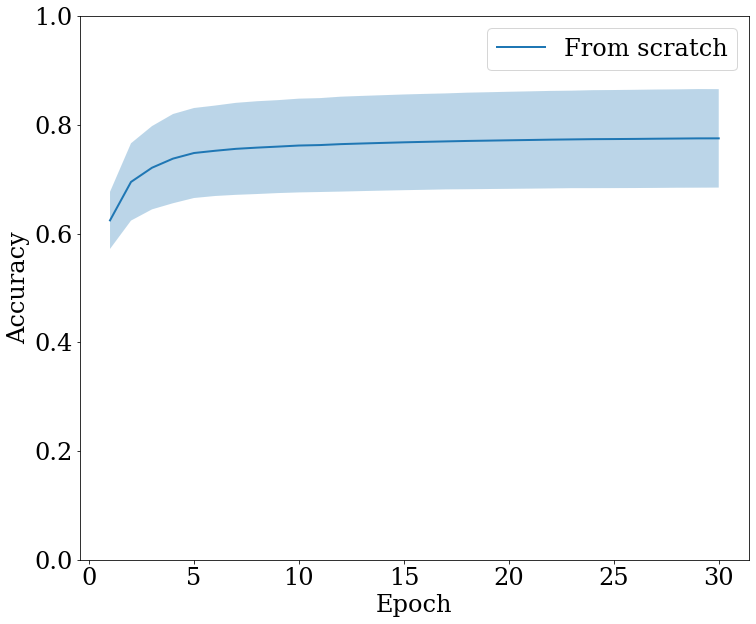

In [14]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs + 1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

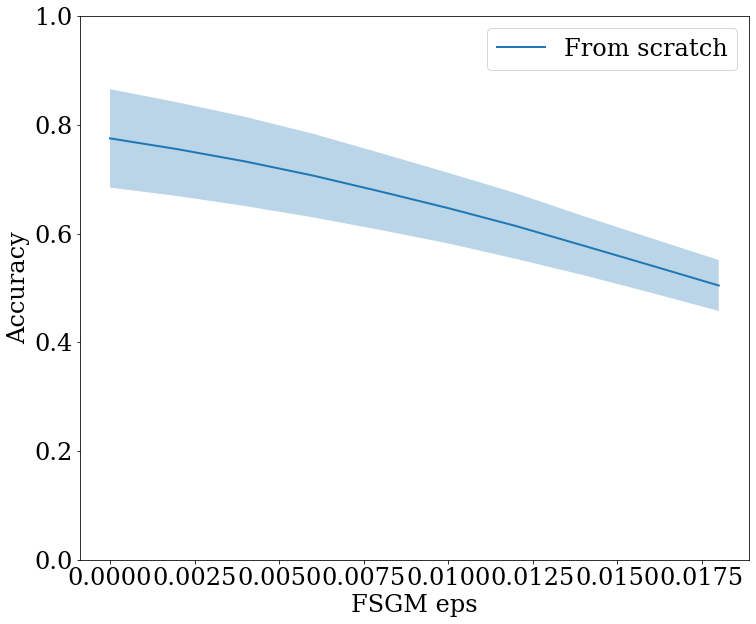

In [15]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

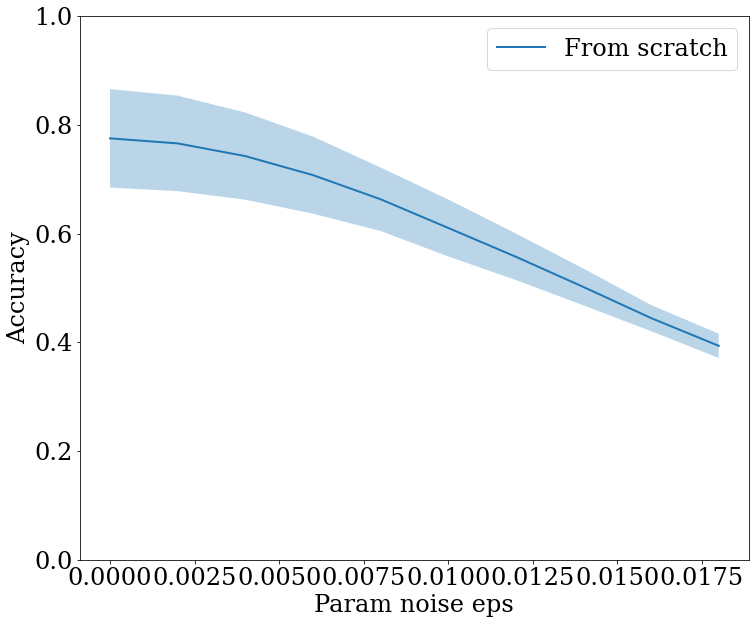

In [16]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [17]:
with open(pipeline.get_path()+'/history_antidistil_sched.json', 'w') as out:
    out.write(json.dumps(history))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
